### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
from gate_variants.cx_variants import CX_Variant_Gate 
from orientation_map import orientation_map_gen
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Load device and the device configuration object ###

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [4]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [5]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [6]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [7]:
qc = generate_cnx_halfdirty(5)

In [8]:
qc.draw()

q_0: ───────■─────────■──
            │         │  
q_1: ───────■─────────■──
            │         │  
q_2: ──■────┼────■────┼──
     ┌─┴─┐  │  ┌─┴─┐  │  
q_3: ┤ X ├──┼──┤ X ├──┼──
     └─┬─┘┌─┴─┐└─┬─┘┌─┴─┐
q_4: ──■──┤ X ├──■──┤ X ├
          └───┘     └───┘

In [9]:
backend = FakeTokyo()

In [10]:
#backend_prop = backend.properties()

In [11]:
orientation_map = None#orientation_map_gen(backend)

In [12]:
transpile_args = _parse_transpile_args([qc], backend, seed_transpiler = 0, orientation_map = orientation_map)

In [13]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [14]:
print(pass_manager_config.orientation_map)

None


In [15]:
pm_context = level_3_context_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [16]:
pm_orign = level_3_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [17]:
qc_context = pm_context.run(qc)

ccx
ccx
ccx
ccx
Layout({
11: Qubit(QuantumRegister(5, 'q'), 4),
16: Qubit(QuantumRegister(5, 'q'), 0),
17: Qubit(QuantumRegister(5, 'q'), 1),
5: Qubit(QuantumRegister(5, 'q'), 2),
6: Qubit(QuantumRegister(5, 'q'), 3)
})
The physical qubits for the toffoli are:  11 5 6
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False True True
['00', '12', 'f', 's'] ['12', '00', 'f', 'p']
('00', '12', 'f', 's')
('12', '00', 'f', 'p')
['00', '12', 'f', 's'] ['00', '00', 'f', 'p']
('00', '12', 'f', 's')
('00', '00', 'f', 'p')
The physical qubits for the toffoli are:  16 17 11
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
('00', '01', 'f', 's')
('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  11 5 6
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  16 17 11
The r

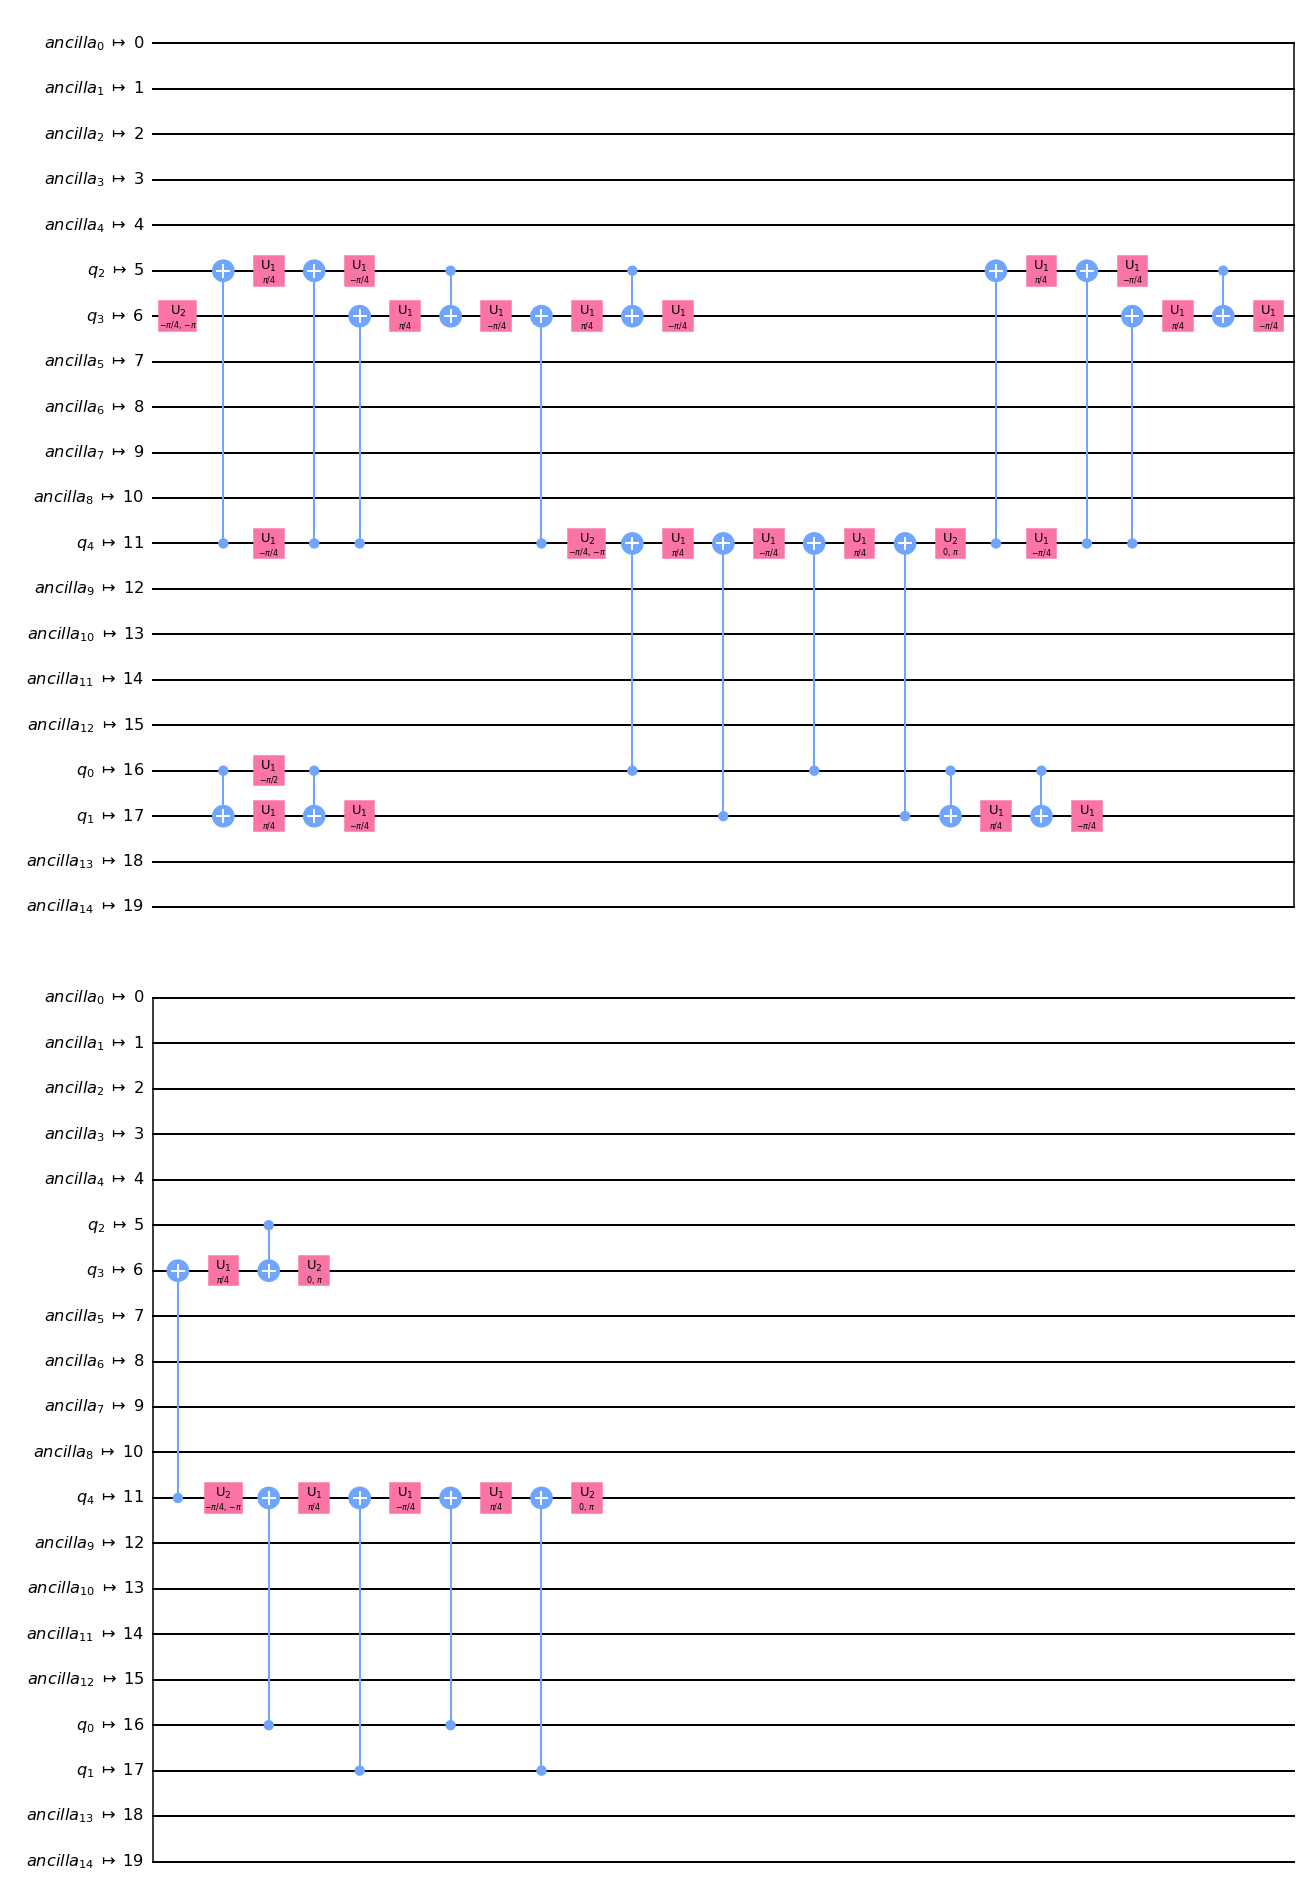

In [21]:
qc_context.draw(output = 'mpl')

In [19]:
qc_context.count_ops()

OrderedDict([('cx', 24), ('u1', 24), ('u2', 6)])

In [22]:
qc_orign = pm_orign.run(qc)

ccx
ccx
ccx
ccx
Layout({
11: Qubit(QuantumRegister(5, 'q'), 4),
16: Qubit(QuantumRegister(5, 'q'), 0),
17: Qubit(QuantumRegister(5, 'q'), 1),
5: Qubit(QuantumRegister(5, 'q'), 2),
6: Qubit(QuantumRegister(5, 'q'), 3)
})


In [23]:
qc_orign.count_ops()

OrderedDict([('cx', 24), ('u1', 24), ('u2', 6)])

In [ ]:
t_circ.draw()